# Clustering & PCA Assignment 

- As CEO of the HELP International NGO needs to decide how to use $ 10 million money strategically and effectively. 
- categorise the countries using some socio-economic and health factors that determine the overall development of the    country.
- decide in choosing the countries that are in the direst need of aid

### Importing and Understanding the data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
datadic=pd.read_csv('C:\\Users\\sonsh\\Downloads\\data-dictionary.csv')
contry_raw=pd.read_csv('C:\\Users\\sonsh\\Downloads\\Country-data.csv')

In [3]:
datadic

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [4]:
contry_raw.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
print(len(datadic))
print(len(contry_raw))

10
167


In [6]:
contry_raw.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
contry_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
contry_raw.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
# Converting Exports and imports into Numbers from %
contry_raw['exports']=contry_raw['exports']*contry_raw['gdpp']/100
contry_raw['imports']=contry_raw['imports']*contry_raw['gdpp']/100
contry_raw['health']=contry_raw['health']*contry_raw['gdpp']/100

### Checking for Outliers

In [10]:
contraw=contry_raw.copy()
num_contraw = contraw.drop(['country'],axis=1)

In [11]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_contraw.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


#### from the above it is clear that there are outliers in income , inflation and gdpp

In [12]:
q_income=num_contraw.income.quantile(.99)
q_inflation=num_contraw.inflation.quantile(.99)
q_gdpp=num_contraw.gdpp.quantile(.99)

In [13]:
q_income
q_inflation
q_gdpp

79088.00000000004

In [14]:
# contraw_data=contraw[(contraw['income'] <=q_income) & (contraw['inflation'] <=q_inflation) & (contraw['gdpp'] <=q_gdpp)]

In [15]:
contraw_data =contraw

In [16]:
len(contraw_data)

167

### Caping the outliers

In [17]:
contraw_data.income[(contraw['income'] >q_income)] =q_income
contraw_data.inflation[(contraw['inflation'] >q_inflation)] =q_inflation
contraw_data.gdpp[(contraw['gdpp'] >q_gdpp)] =q_gdpp

C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [18]:
#num_contraw = contraw_data.drop(['country'],axis=1)
# Checking outliers at 25%,50%,75%,90%,95% and 99%
contraw_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,16857.550898,7.380970,70.555689,2.947964,12756.826347
std,40.328931,17973.885795,1801.408906,14710.810418,17957.012855,7.793224,8.893172,1.513848,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,81883.160000,39.974520,82.370000,6.563600,76125.920000


### Check for missing values

In [19]:
# Checking the percentage of missing values
round(100*(contraw_data.isnull().sum()/len(contraw_data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

## Applying PCA

In [20]:
y=contraw_data.pop('country')

In [21]:
contraw_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [22]:
scaler=StandardScaler()

In [23]:
X=contraw_data.copy()

In [24]:
x=scaler.fit_transform(X)

In [25]:
x[:5,:5]

array([[ 1.29153238, -0.4110113 , -0.56503989, -0.4322755 , -0.85166773],
       [-0.5389489 , -0.35019096, -0.43921769, -0.31367739, -0.38694552],
       [-0.27283273, -0.31852577, -0.48482608, -0.35372048, -0.2210531 ],
       [ 2.00780766, -0.29137452, -0.53236319, -0.34595254, -0.61204534],
       [-0.69563412, -0.10433146, -0.17877054,  0.04073499,  0.12525431]])

In [26]:
from sklearn.decomposition import PCA 

In [27]:
pca =PCA(svd_solver = 'randomized',random_state=42)

In [28]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [29]:
pca.components_

array([[-0.31706792,  0.33479209,  0.35930329,  0.33835762,  0.38647597,
        -0.16411519,  0.34528584, -0.30457846,  0.3943471 ],
       [ 0.4743931 ,  0.41442909,  0.16677906,  0.38893864,  0.12395958,
         0.17448065, -0.37011887,  0.45941045,  0.17394191],
       [-0.16253934,  0.02592188, -0.11232006, -0.02854328,  0.17121433,
         0.94708984,  0.17222035, -0.05924214,  0.00393773],
       [-0.15259668,  0.44886436, -0.54341641,  0.46749337, -0.18641664,
        -0.06540062, -0.01010679, -0.2212313 , -0.41630489],
       [ 0.21232387, -0.03865089, -0.33135853, -0.18220424,  0.5760509 ,
        -0.05457223, -0.48025914, -0.47884978,  0.12517627],
       [-0.06554298,  0.01631893, -0.49135486, -0.12329137,  0.47167399,
        -0.19329664,  0.38485123,  0.57303828,  0.04984146],
       [ 0.75827663, -0.01241206, -0.04773765,  0.02799592, -0.04813138,
         0.011297  ,  0.57809382, -0.28933226, -0.03807824],
       [-0.01824549,  0.12383163, -0.40104862, -0.10492397, -0

In [30]:
#what is the importance of above component
pca.explained_variance_ratio_

array([0.59548272, 0.17983823, 0.09851263, 0.06464368, 0.02570327,
       0.02350389, 0.00940071, 0.00229765, 0.00061723])

In [31]:
import matplotlib.pyplot as plt

<BarContainer object of 9 artists>

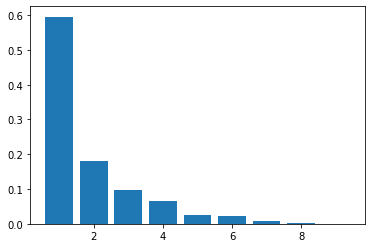

In [32]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

In [33]:
var_cum = np.cumsum(pca.explained_variance_ratio_)

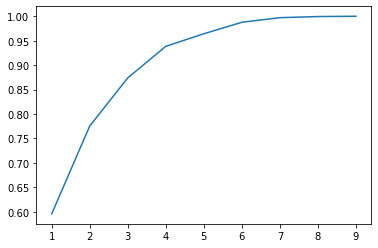

In [34]:
plt.plot(range(1,len(var_cum)+1),var_cum)

In [35]:
#PCA with 5 components
pca5 = PCA(svd_solver = 'randomized',n_components=5 , random_state = 42)

In [36]:
new_data_cont = pca5.fit_transform(x)

In [37]:
new_data_cont.shape

(167, 5)

In [38]:
df=pd.DataFrame(new_data_cont , columns=["PC1","PC2","PC3","PC4","PC5"])

In [39]:
df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.684592,1.471967,-0.433949,-0.247431,-0.170481
1,-0.009830,-1.430559,-0.121271,0.504884,-0.062575
2,-0.528702,-0.660302,1.241437,0.165056,-0.372444
3,-2.861011,2.191592,1.130435,-0.559789,-0.300241
4,0.704677,-1.020307,-0.420169,0.328285,-0.060699


In [40]:
df_final=pd.concat([df,y],axis=1)

In [41]:
df_final.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.684592,1.471967,-0.433949,-0.247431,-0.170481,Afghanistan
1,-0.009830,-1.430559,-0.121271,0.504884,-0.062575,Albania
2,-0.528702,-0.660302,1.241437,0.165056,-0.372444,Algeria
3,-2.861011,2.191592,1.130435,-0.559789,-0.300241,Angola
4,0.704677,-1.020307,-0.420169,0.328285,-0.060699,Antigua and Barbuda


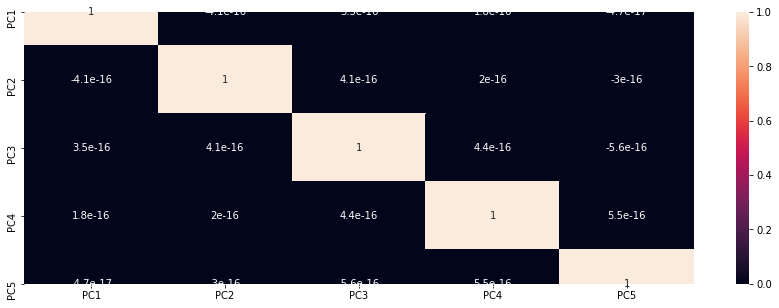

In [42]:
plt.figure(figsize = (15,5))     # Size of the figure
sns.heatmap(df_final.corr(),annot = True)

In [43]:
df_final.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,PC1,PC2,PC3,PC4,PC5
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,3.456982e-17,4.254747e-17,1.678631e-17,-8.077371e-17,5.600975e-17
std,2.321988e+00,1.276046e+00,9.444335e-01,7.650476e-01,4.824137e-01
min,-3.959410e+00,-1.697183e+00,-1.768429e+00,-3.186788e+00,-1.405764e+00
25%,-1.534383e+00,-9.731313e-01,-5.123314e-01,-2.565069e-01,-2.857998e-01
50%,-3.706641e-01,-3.916191e-01,-2.353702e-01,1.249669e-01,-6.447018e-02
75%,9.077320e-01,6.879895e-01,2.981625e-01,3.728085e-01,1.782814e-01
90%,3.073545e+00,1.584072e+00,1.200641e+00,4.866717e-01,4.026073e-01
95%,4.022077e+00,2.179212e+00,1.704326e+00,5.467479e-01,7.594416e-01
99%,6.518025e+00,3.056576e+00,3.559191e+00,1.974282e+00,1.950038e+00


{'whiskers': [<matplotlib.lines.Line2D at 0x2732000d5c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2732000df48>,
 'boxes': [<matplotlib.lines.Line2D at 0x27320009a88>],
 'medians': [<matplotlib.lines.Line2D at 0x27320012ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27320018ec8>],
 'means': []}

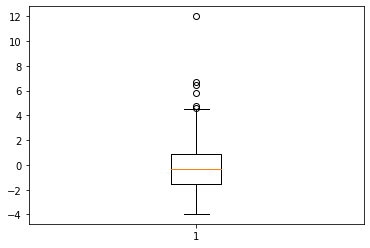

In [44]:
plt.boxplot(df_final.PC1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2732007ab48>,
 'caps': [<matplotlib.lines.Line2D at 0x2732007dc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x27320076f48>],
 'medians': [<matplotlib.lines.Line2D at 0x27320082d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x27320082e88>],
 'means': []}

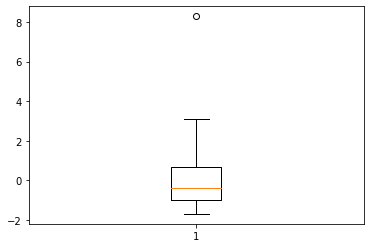

In [45]:
plt.boxplot(df_final.PC2)

{'whiskers': [<matplotlib.lines.Line2D at 0x273200e4788>,
 'caps': [<matplotlib.lines.Line2D at 0x273200e4ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x273200ddcc8>],
 'medians': [<matplotlib.lines.Line2D at 0x273200e7fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x273200ebe48>],
 'means': []}

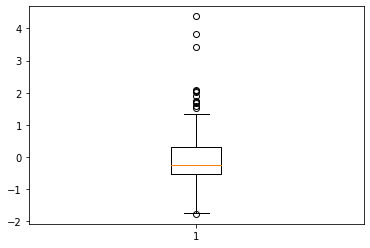

In [46]:
plt.boxplot(df_final.PC3)

{'whiskers': [<matplotlib.lines.Line2D at 0x2732014d948>,
 'caps': [<matplotlib.lines.Line2D at 0x27320152908>,
 'boxes': [<matplotlib.lines.Line2D at 0x27320147e08>],
 'medians': [<matplotlib.lines.Line2D at 0x27320152fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27320157f08>],
 'means': []}

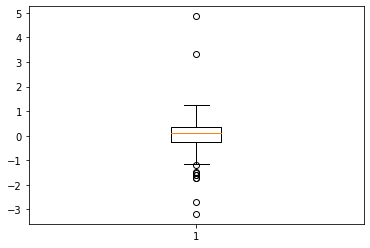

In [47]:
plt.boxplot(df_final.PC4)

{'whiskers': [<matplotlib.lines.Line2D at 0x2732024d908>,
 'caps': [<matplotlib.lines.Line2D at 0x273202528c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2732024ae88>],
 'medians': [<matplotlib.lines.Line2D at 0x27320256988>],
 'fliers': [<matplotlib.lines.Line2D at 0x27320256a88>],
 'means': []}

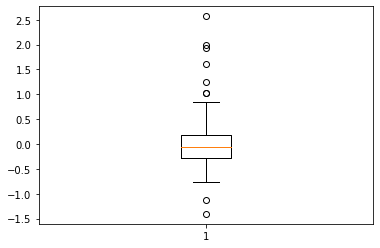

In [48]:
plt.boxplot(df_final.PC5)

In [49]:
# For PC1
Q1 = df_final.PC1.quantile(0.95)
Q2 = df_final.PC2.quantile(0.95)
Q3 = df_final.PC3.quantile(0.95)
Q5 = df_final.PC5.quantile(0.95)


Q1L = df_final.PC1.quantile(0.01)
Q2L = df_final.PC2.quantile(0.01)
Q5L = df_final.PC5.quantile(0.01)

df_final['PC1'][(df_final.PC1 >=Q1)]=Q1
df_final['PC2'][(df_final.PC2 >=Q2)]=Q2
df_final['PC5'][(df_final.PC5 >=Q5)]=Q5


df_final['PC1'][(df_final.PC1 <Q1L)]=Q1L
df_final['PC2'][(df_final.PC2 <Q2L)]=Q2L
df_final['PC5'][(df_final.PC5 <Q5L)]=Q5L



C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\sonsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [50]:
df_final.shape

(167, 6)

{'whiskers': [<matplotlib.lines.Line2D at 0x273202c43c8>,
 'caps': [<matplotlib.lines.Line2D at 0x273202c4fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x273202beb48>],
 'medians': [<matplotlib.lines.Line2D at 0x273202c8c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x273202c8d88>],
 'means': []}

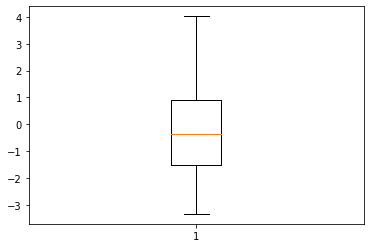

In [51]:
plt.boxplot(df_final.PC1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2732032ba08>,
 'caps': [<matplotlib.lines.Line2D at 0x2732032f9c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x27320325f08>],
 'medians': [<matplotlib.lines.Line2D at 0x27320335948>],
 'fliers': [<matplotlib.lines.Line2D at 0x27320335f88>],
 'means': []}

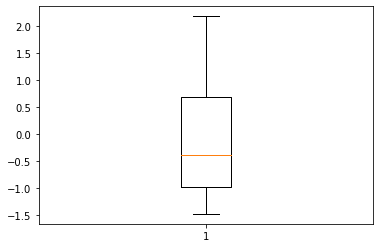

In [52]:
plt.boxplot(df_final.PC2)

{'whiskers': [<matplotlib.lines.Line2D at 0x2732039c2c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2732039cb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x27320398888>],
 'medians': [<matplotlib.lines.Line2D at 0x2732039fb08>],
 'fliers': [<matplotlib.lines.Line2D at 0x273203a4988>],
 'means': []}

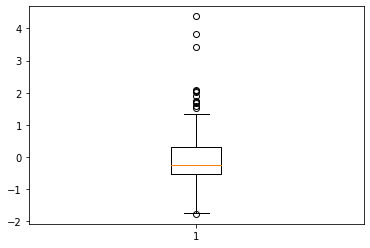

In [53]:
plt.boxplot(df_final.PC3)

{'whiskers': [<matplotlib.lines.Line2D at 0x27320401f88>,
 'caps': [<matplotlib.lines.Line2D at 0x27320406fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x27320401608>],
 'medians': [<matplotlib.lines.Line2D at 0x2732040bf48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2732040bfc8>],
 'means': []}

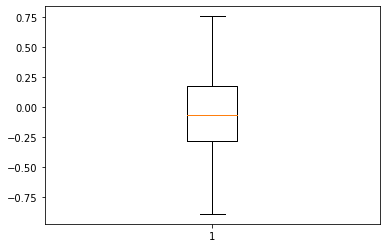

In [54]:
plt.boxplot(df_final.PC5)

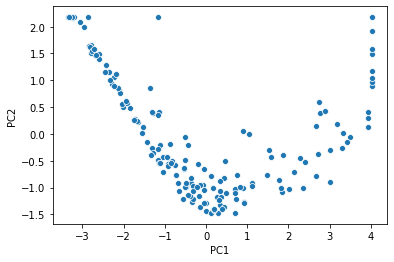

In [55]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_final)

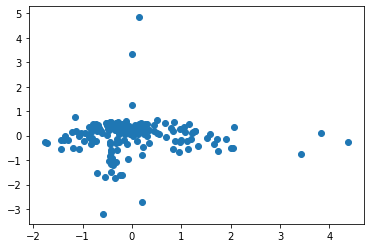

In [56]:
plt.scatter(x = 'PC3', y = 'PC4', data = df_final)

In [57]:
df_final.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.684592,1.471967,-0.433949,-0.247431,-0.170481,Afghanistan
1,-0.009830,-1.430559,-0.121271,0.504884,-0.062575,Albania
2,-0.528702,-0.660302,1.241437,0.165056,-0.372444,Algeria
3,-2.861011,2.179212,1.130435,-0.559789,-0.300241,Angola
4,0.704677,-1.020307,-0.420169,0.328285,-0.060699,Antigua and Barbuda


# Clustering

### Applying the Hopkins statistics to understand the data is good for clustering or not

In [58]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from sklearn.cluster import KMeans

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [59]:
hopkins(df_final.drop(['country'], axis = 1))

0.8676509949713651

In [60]:
# A hopkin of >75% hence this is good for clustering JUST GOOD
df_Cont_model = df_final.drop(['country'], axis=1).copy()
df_Cont_model.shape

(167, 5)

# Kmeans

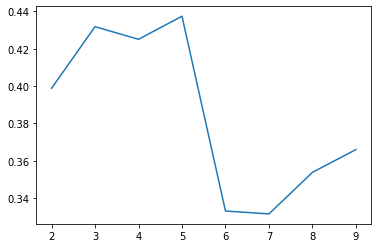

In [61]:
# Check the optimal K
# sILHOUETTE
#Elbow
from sklearn.metrics import silhouette_score
sil = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(df_Cont_model)
    sil.append([k, silhouette_score(df_Cont_model, kmeans.labels_)])
plt.plot(pd.DataFrame(sil)[0], pd.DataFrame(sil)[1])

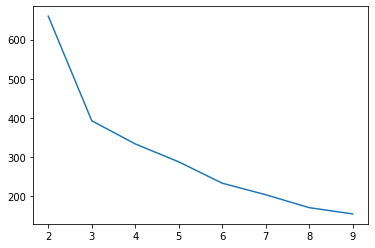

In [62]:
ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df_Cont_model)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

In [63]:
### Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_Cont_model)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_Cont_model, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4338661381762798
For n_clusters=3, the silhouette score is 0.43184059721555484
For n_clusters=4, the silhouette score is 0.42507517114042553
For n_clusters=5, the silhouette score is 0.4148551572925069
For n_clusters=6, the silhouette score is 0.3419323180405432
For n_clusters=7, the silhouette score is 0.3199288084452012
For n_clusters=8, the silhouette score is 0.3523659362906593


In [64]:
# K = 4
model_clus3 = KMeans(n_clusters =4, random_state = 50)
model_clus3.fit(df_Cont_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [65]:
dat_km = pd.concat([df_final.reset_index().drop('index', axis=1), pd.Series(model_clus3.labels_).reset_index().drop('index', axis=1)], axis = 1)

In [66]:
dat_km.columns = [ 'PC1', 'PC2', 'PC3', 'PC4','PC5', 'country','ClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,country,ClusterID
0,-2.684592,1.471967,-0.433949,-0.247431,-0.170481,Afghanistan,2
1,-0.009830,-1.430559,-0.121271,0.504884,-0.062575,Albania,1
2,-0.528702,-0.660302,1.241437,0.165056,-0.372444,Algeria,1
3,-2.861011,2.179212,1.130435,-0.559789,-0.300241,Angola,3
4,0.704677,-1.020307,-0.420169,0.328285,-0.060699,Antigua and Barbuda,1


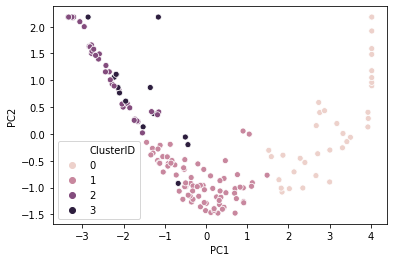

In [67]:
sns.scatterplot(x = 'PC1', y= 'PC2', hue = 'ClusterID', data = dat_km)

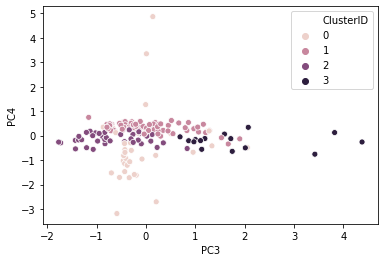

In [68]:
sns.scatterplot(x = 'PC3', y= 'PC4', hue = 'ClusterID', data = dat_km)

In [69]:
dat5 = pd.merge(contry_raw, dat_km, how = 'outer', on = 'country')
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.684592,1.471967,-0.433949,-0.247431,-0.170481,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.009830,-1.430559,-0.121271,0.504884,-0.062575,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.528702,-0.660302,1.241437,0.165056,-0.372444,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.861011,2.179212,1.130435,-0.559789,-0.300241,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.704677,-1.020307,-0.420169,0.328285,-0.060699,1


### Ploting Scatter plot to understading Clustering between Child_mort , Health and GDPP

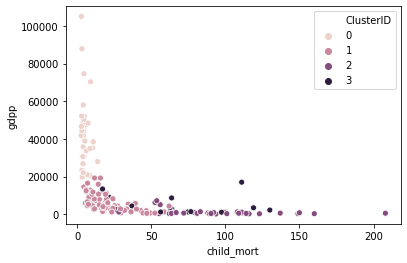

In [70]:
sns.scatterplot(x = 'child_mort', y= 'gdpp', hue = 'ClusterID', data = dat5)

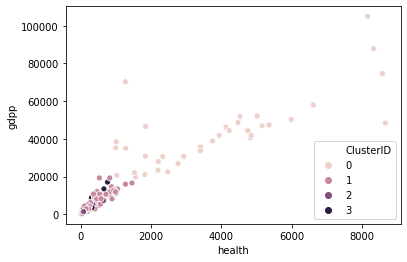

In [71]:
sns.scatterplot(x = 'health', y= 'gdpp', hue = 'ClusterID', data = dat5)

In [72]:
print(len(contry_raw))
print(len(dat_km))
print(len(dat5))

167
167
167


In [73]:
# plot
dat5.drop(['PC1','PC2','PC3','PC4','PC5'], axis = 1, inplace = True)

In [74]:
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


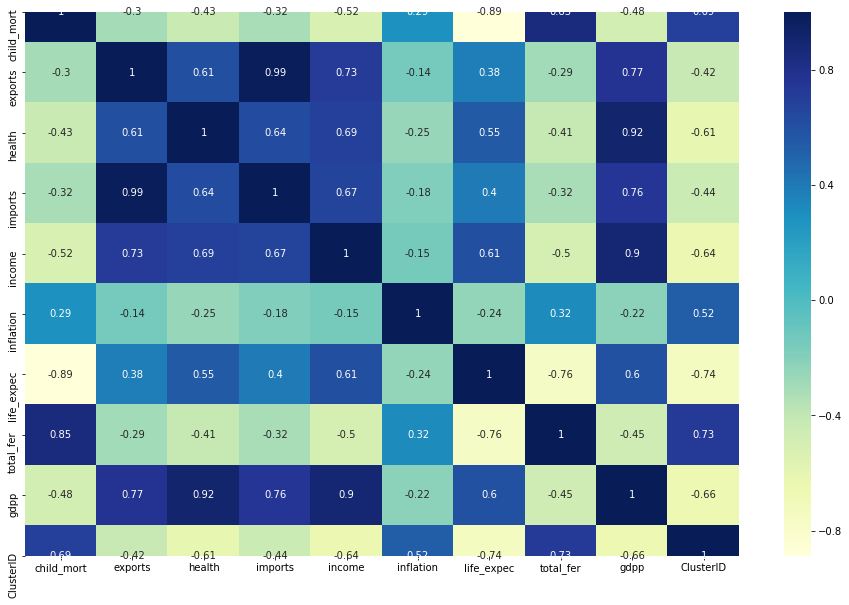

In [75]:
plt.figure(figsize = (16, 10))
sns.heatmap(dat5.corr(), annot = True, cmap="YlGnBu")
plt.show()

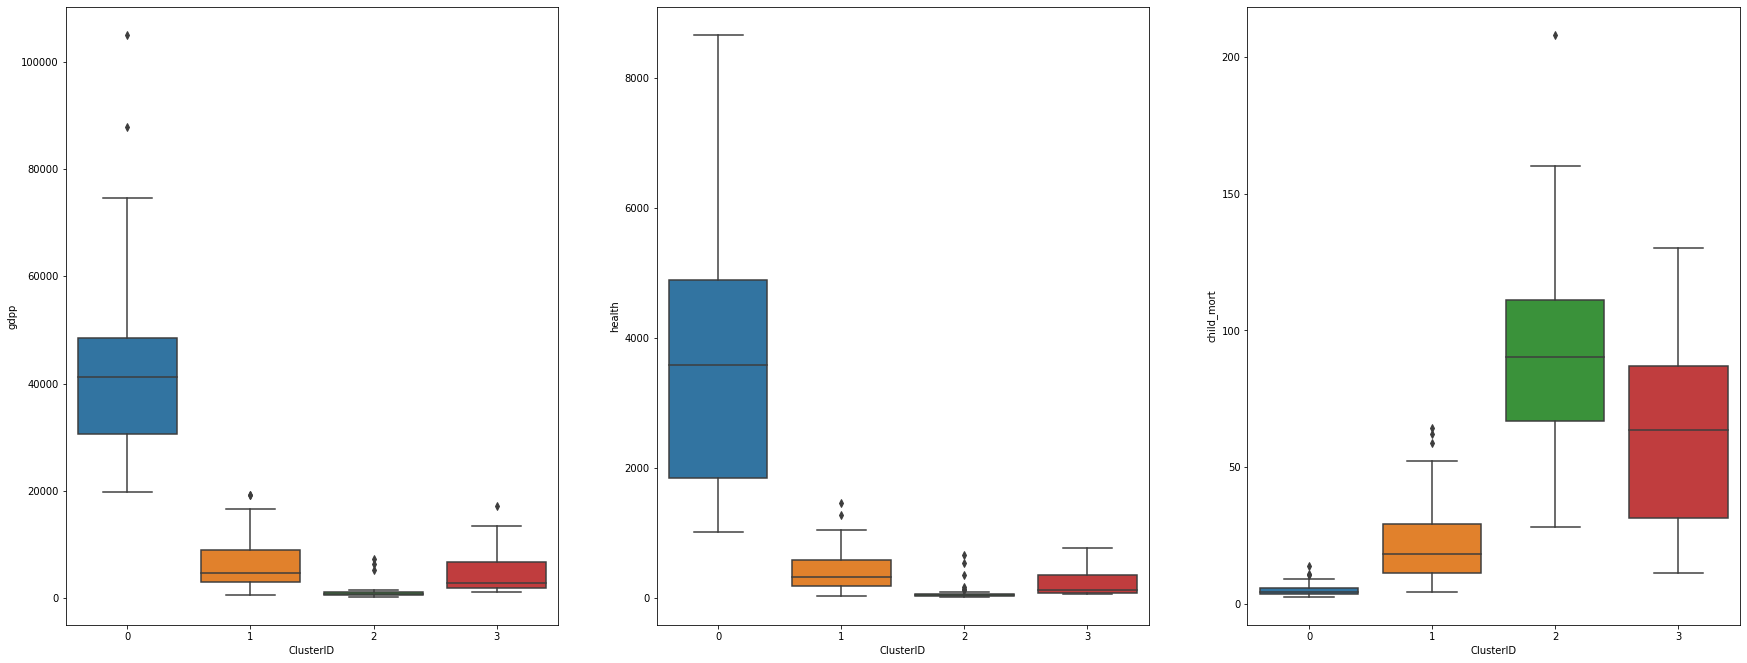

In [76]:
plt.figure(figsize=(30, 25))
plt.subplot(2,3,1)
sns.boxplot(y = 'gdpp', x = 'ClusterID', data = dat5)
plt.subplot(2,3,2)
sns.boxplot(y = 'health', x = 'ClusterID', data = dat5)
plt.subplot(2,3,3)
sns.boxplot(y = 'child_mort', x = 'ClusterID', data = dat5)
#plt.subplot(2,3,4)
#sns.boxplot(y = 'inflation', x = 'ClusterID', data = dat5)
#plt.subplot(2,3,5)
#sns.boxplot(y = 'imports', x = 'ClusterID', data = dat5)
#plt.subplot(2,3,5)
#sns.boxplot(y = 'exports', x = 'ClusterID', data = dat5)
plt.show()

In [77]:
dat5.ClusterID.value_counts()

1    79
2    37
0    36
3    15
Name: ClusterID, dtype: int64

In [78]:
dat5[(dat5.ClusterID==2)].sort_values(by=['gdpp','child_mort']).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2


## Hierarchical Clustering

In [79]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
df_Cont_model.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.684592,1.471967,-0.433949,-0.247431,-0.170481
1,-0.009830,-1.430559,-0.121271,0.504884,-0.062575
2,-0.528702,-0.660302,1.241437,0.165056,-0.372444
3,-2.861011,2.179212,1.130435,-0.559789,-0.300241
4,0.704677,-1.020307,-0.420169,0.328285,-0.060699


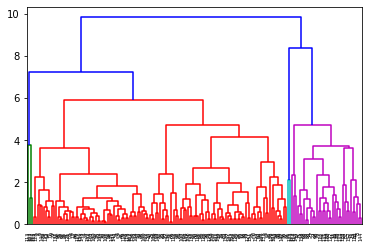

In [80]:
# complete linkage
mergings = linkage(df_Cont_model, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [81]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0])

In [82]:
print(len(cluster_labels))
print(len(dat5))

167
167


In [83]:
dat5['cluster_labels'] = cluster_labels
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0


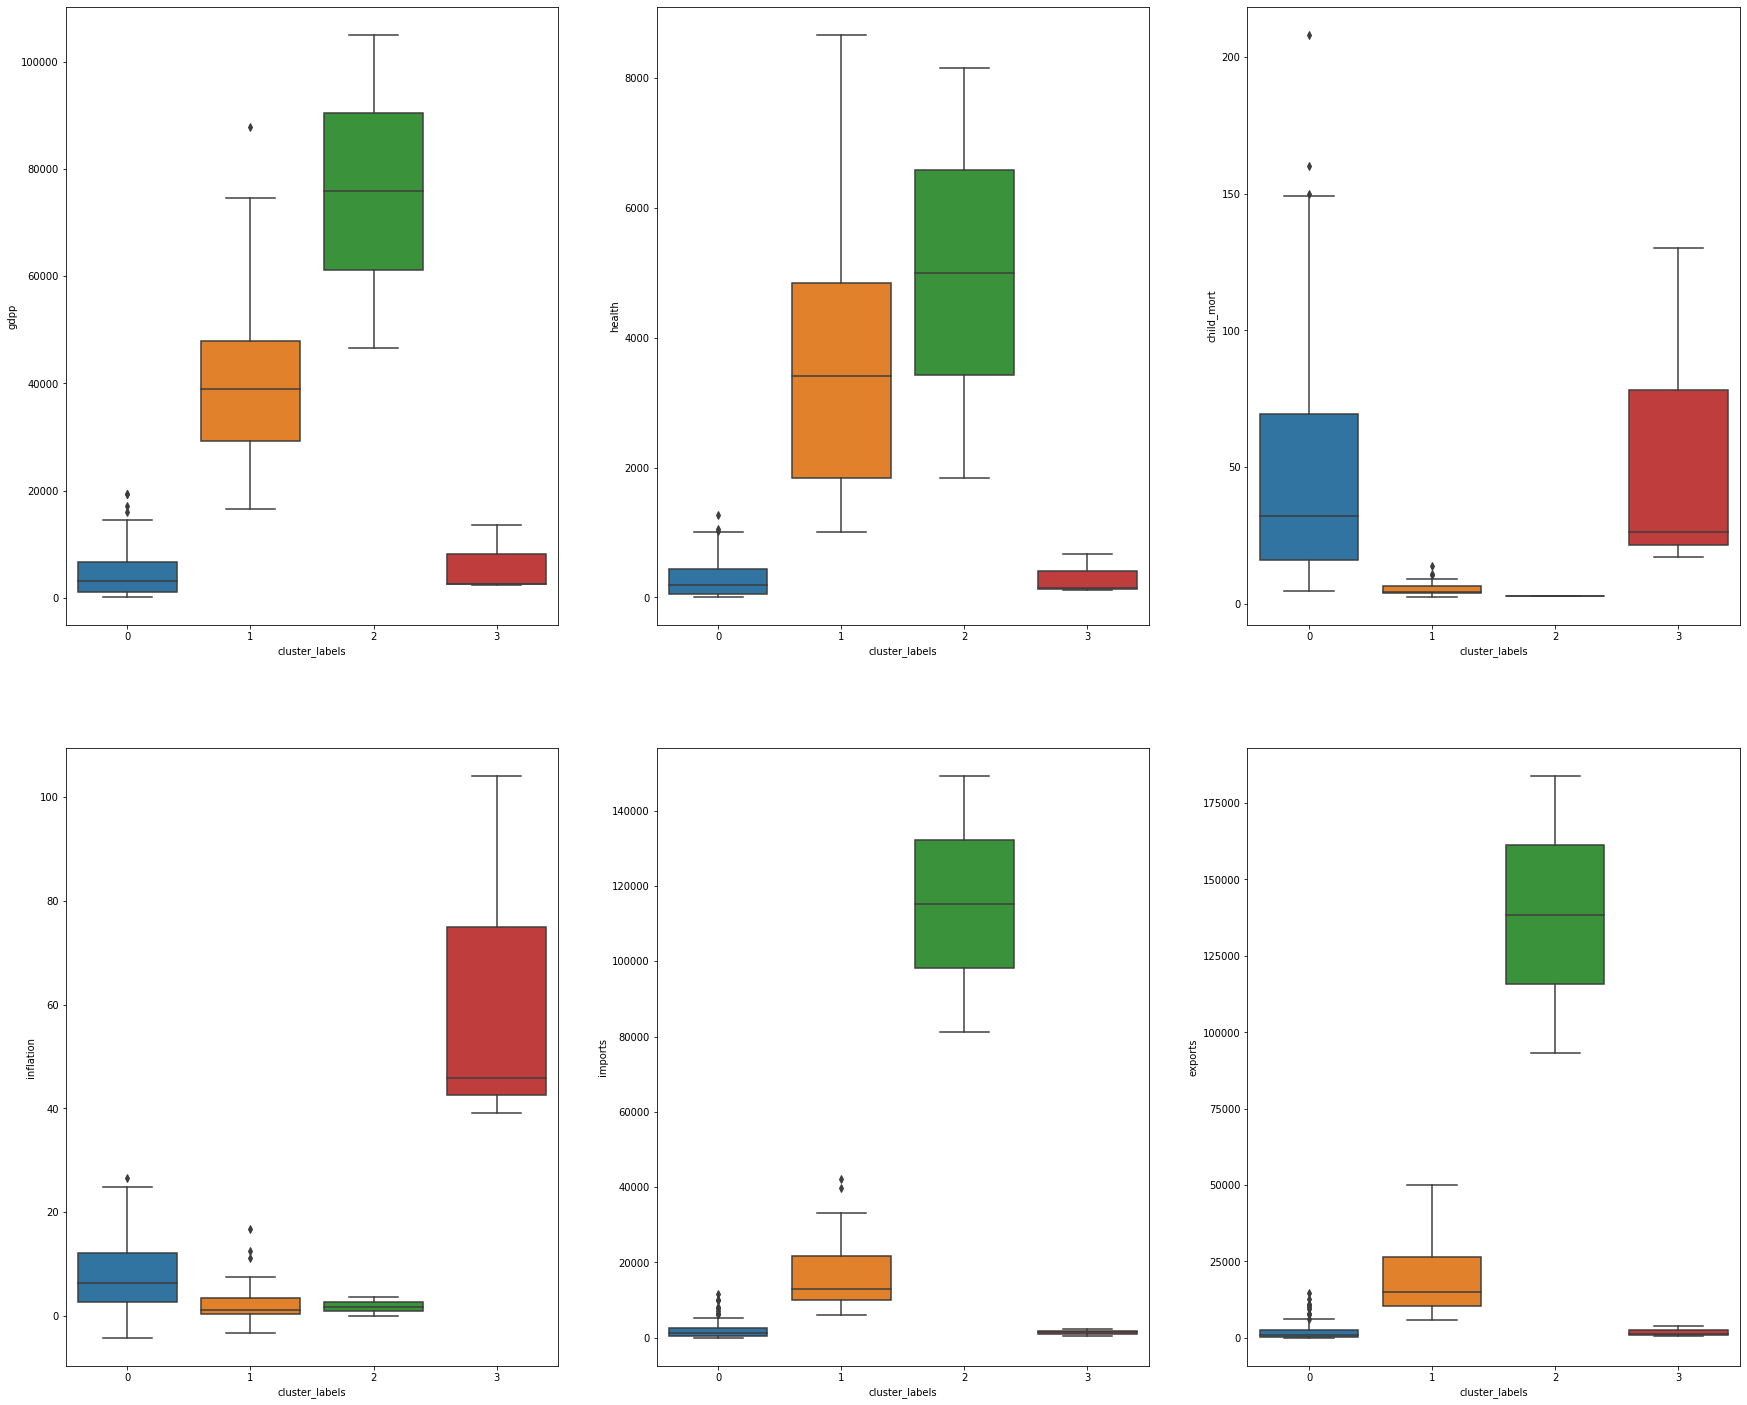

In [84]:
plt.figure(figsize=(30, 25))
plt.subplot(2,3,1)
sns.boxplot(y = 'gdpp', x = 'cluster_labels', data = dat5)
plt.subplot(2,3,2)
sns.boxplot(y = 'health', x = 'cluster_labels', data = dat5)
plt.subplot(2,3,3)
sns.boxplot(y = 'child_mort', x = 'cluster_labels', data = dat5)
plt.subplot(2,3,4)
sns.boxplot(y = 'inflation', x = 'cluster_labels', data = dat5)
plt.subplot(2,3,5)
sns.boxplot(y = 'imports', x = 'cluster_labels', data = dat5)
plt.subplot(2,3,6)
sns.boxplot(y = 'exports', x = 'cluster_labels', data = dat5)

plt.show()

In [85]:
dat5.cluster_labels.value_counts()

0    127
1     35
3      3
2      2
Name: cluster_labels, dtype: int64

### calculating the % health spend as Per GDPP

In [86]:
dat5['healthPercent']=dat5['health']*100/dat5['gdpp']
dat5['ChildMorPercent']=dat5['child_mort']*100/dat5['gdpp']

### As Per Hierarical Clustering Top 10 countries that have low GDPP , and low health spending 

In [87]:
dat5[(dat5.cluster_labels==0)].sort_values(by=['healthPercent']).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels,healthPercent,ChildMorPercent
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988,1,0,1.97,6.518219
116,Pakistan,92.1,140.40000,22.8800,201.760000,4280,10.90,65.3,3.85,1040,2,0,2.20,8.855769
38,"Congo, Rep.",63.9,2331.74000,67.4040,1498.780000,5190,20.70,60.4,4.95,2740,3,0,2.46,2.332117
154,Turkmenistan,62.0,3387.72000,111.0000,1975.800000,9940,2.31,67.9,2.83,4440,1,0,2.50,1.396396
70,Indonesia,33.3,755.73000,81.1710,696.640000,8430,15.30,69.9,2.48,3110,1,0,2.61,1.070740
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.60,61.7,4.61,482,2,0,2.66,11.452282
115,Oman,11.7,12680.10000,534.6100,7951.600000,45300,15.60,76.1,2.90,19300,1,0,2.77,0.060622
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900,22.40,60.1,6.16,3530,3,0,2.85,3.371105
140,Sri Lanka,11.2,550.76000,82.6140,753.080000,8560,22.80,74.4,2.20,2810,3,0,2.94,0.398577
131,Seychelles,14.4,10130.40000,367.2000,11664.000000,20400,-4.21,73.4,2.17,10800,1,0,3.40,0.133333


### As per Hierarical Clustering top 10 countries having High Child Mortage %

In [88]:
dat5[(dat5.cluster_labels==0)].sort_values(by=['ChildMorPercent'], ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels,healthPercent,ChildMorPercent
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,0,11.60,40.519481
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0,13.10,40.100251
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2,0,5.16,35.344828
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,0,7.91,34.730539
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2,0,3.98,33.408072
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.45,32.1,3.33,662,2,0,6.91,31.419940
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2,0,11.80,27.308869
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2,0,5.21,24.105012
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2,0,8.50,20.840951
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2,0,6.74,20.173913


### As Per Kmeans Clustering Top 10 countries that have low GDPP , and low health spending 

In [89]:
dat5[(dat5.ClusterID==2)].sort_values(by=['healthPercent']).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels,healthPercent,ChildMorPercent
116,Pakistan,92.1,140.4000,22.8800,201.760,4280,10.900,65.3,3.85,1040,2,0,2.20,8.855769
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.600,61.7,4.61,482,2,0,2.66,11.452282
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.790,60.8,4.60,413,2,0,3.77,15.060533
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,2,0,3.98,33.408072
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,2,0,4.10,14.643799
84,Lao,78.9,403.5600,50.9580,562.020,3980,9.200,63.8,3.15,1140,2,0,4.47,6.921053
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,2,0,4.51,11.469441
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,2,0,4.53,16.722408
80,Kenya,62.2,200.1690,45.9325,324.912,2480,2.090,62.8,4.37,967,2,0,4.75,6.432265
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.100,58.0,5.34,648,2,0,4.93,16.820988


### As per Kmeans Clustering top 10 countries having High Child Mortage %

In [90]:
dat5[(dat5.ClusterID==2)].sort_values(by=['ChildMorPercent'], ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels,healthPercent,ChildMorPercent
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,0,11.60,40.519481
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0,13.10,40.100251
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2,0,5.16,35.344828
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,0,7.91,34.730539
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2,0,3.98,33.408072
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.45,32.1,3.33,662,2,0,6.91,31.419940
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2,0,11.80,27.308869
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2,0,5.21,24.105012
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2,0,8.50,20.840951
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2,0,6.74,20.173913


### From the result of K Means and Hierarchical it is understood that :
Cluster 2 (37 Countries) is having low GDPP , Health spend and high Child Mort. Hence the countries associated with them are very much in need.
Contries in Cluster 0 (Count - 15) have high GDPP,health and Low ChildMort hence don’t need any help.
Contries in cluster 3 has low GDPP , health and high childMort after Cluster 2. hence can be considered as per the budget

And from above table it is determind that these 10 countries are in need of AID and NGOs should fund them.
